In [16]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct  9 20:11:57 2017

@author: mraissi
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.use('pgf')

# def figsize(scale, nplots = 1):
#     fig_width_pt = 390.0                          # Get this from LaTeX using \the\textwidth
#     inches_per_pt = 1.0/72.27                       # Convert pt to inch
#     golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
#     fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
#     fig_height = nplots*fig_width*golden_mean              # height in inches
#     fig_size = [fig_width,fig_height]
#     return fig_size
def figsize(width_scale, height_scale, nplots=1):
    fig_width_pt = 390.0  # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0 / 72.27  # Convert pt to inch
    golden_mean = (np.sqrt(5.0) - 1.0) / 2.0  # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt * inches_per_pt * width_scale  # width in inches
    fig_height = nplots * fig_width * golden_mean * height_scale  # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size


pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(1.0,1.0),     # default fig size of 0.9 textwidth
    "pgf.preamble": '\\usepackage[utf8x]{inputenc},\\usepackage[T1]{fontenc}',
        # plots will be generated using this preamble
        
    }
mpl.rcParams.update(pgf_with_latex)

# I make my own newfig and savefig functions
def newfig(width, nplots = 1):
    fig = plt.figure(figsize=figsize(width, nplots))
    ax = fig.add_subplot(111)
    return fig, ax

def savefig(filename, crop = True):
    if crop == True:
        plt.savefig('{}'.format(filename), bbox_inches='tight', pad_inches=0)
    else:
        plt.savefig('{}'.format(filename))

def ema(y, a):
   s = []
   s.append(y[0])
   for t in range(1, len(y)):
       s.append(a * y[t] + (1-a) * s[t-1])
   return np.array(s)
   
y = [0]*200
y.extend([20]*(1000-len(y)))
s = ema(y, 0.01)
 

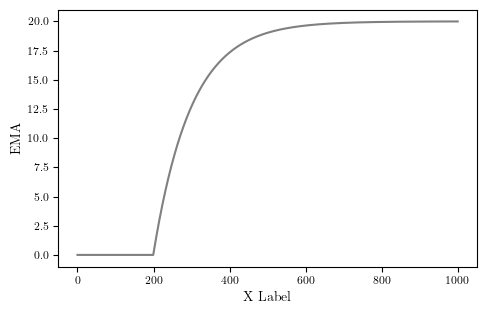

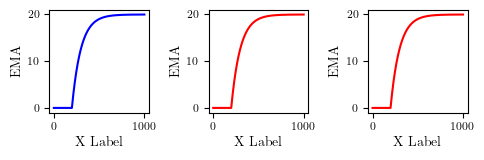

In [37]:
# Modify the existing plot code to create two subplots
fig, axarr = plt.subplots(1, 3, figsize=figsize(1.0, 0.2, nplots=2))  # width_scale = 1.0, height_scale = 0.8
plt.subplots_adjust(wspace=0.6)

# Plot on the first subplot
axarr[0].plot(s, color='blue')
axarr[0].set_xlabel('X Label')
axarr[0].set_ylabel('EMA')

# Plot on the second subplot
axarr[1].plot(s, color='red')  # Example plot, replace with your second plot
axarr[1].set_xlabel('X Label')
axarr[1].set_ylabel('EMA')

# Plot on the second subplot
axarr[2].plot(s, color='red')  # Example plot, replace with your second plot
axarr[2].set_xlabel('X Label')
axarr[2].set_ylabel('EMA')

# Save the figure
savefig('ema')